# Mercedes-Benz Greener Manufacturing
##DESCRIPTION
##Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

Check for null and unique values for test and train sets.

Apply label encoder.

Perform dimensionality reduction.

Predict your test_df values using XGBoost.


In [1]:
#before we start with our analysis and predisction let's import required libraries and load dataset, 
#we will include more libraries when needed, 
#for now based on problem statement I can say we would need pandas, numpy, sklearn train test split, xgboost 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset for training data
#i have renamed the dataset with benz prefix and it is in my jupyter folder names dataset_files,i can import directly from there
train_data = pd.read_csv('dataset_files/benz_train.csv')
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


in the above output for head() we can see that IDV starts from x0 and goes till X385, no of columns is 378
let's use shape attribute to find our rows and columns 

In [3]:
train_data.shape

(4209, 378)

By Default python is showing only few columns which is not enough for our analysis, lets change the display option to see max rows and columns


In [4]:
pd.set_option('display.max_columns', 378)
pd.set_option('display.max_rows', 4209)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
train_data.describe() # lets find staticstical info for dataset numerical columns

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0000

In [6]:
train_data['ID'].value_counts() 

0       1
5600    1
5604    1
5606    1
5611    1
5615    1
5617    1
5618    1
5619    1
5620    1
5622    1
5624    1
5625    1
5626    1
5627    1
5630    1
5632    1
5634    1
5635    1
5636    1
5637    1
5641    1
5642    1
5643    1
5644    1
5647    1
5648    1
5650    1
5651    1
5652    1
5654    1
5601    1
5590    1
5659    1
5588    1
5526    1
5530    1
5531    1
5534    1
5537    1
5538    1
5539    1
5541    1
5542    1
5543    1
5544    1
5545    1
5546    1
5549    1
5552    1
5553    1
5556    1
5557    1
5558    1
5564    1
5569    1
5570    1
5571    1
5573    1
5575    1
5577    1
5578    1
5582    1
5585    1
5657    1
5660    1
5524    1
5722    1
5728    1
5732    1
5734    1
5735    1
5737    1
5738    1
5739    1
5740    1
5742    1
5743    1
5744    1
5746    1
5749    1
5753    1
5756    1
5759    1
5761    1
5763    1
5764    1
5765    1
5767    1
5775    1
5779    1
5781    1
5785    1
5787    1
5792    1
5795    1
5798    1
5727    1
5720    1
5661    1


In [7]:
df_cat = train_data.select_dtypes(include = np.object)
df_num = train_data.select_dtypes(exclude=np.object)
print("Categorical variables:-\n",df_cat.columns)
print("--------------------------------------------")
print("Numerical variables:-\n",df_num.columns)

Categorical variables:-
 Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
--------------------------------------------
Numerical variables:-
 Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


Now that we have categorical and numerical rows seperated, lets plot some bar graph to see the test time consumed for each categorical columns for individual test cases

In [8]:
import matplotlib.pyplot as plt

Y = train_data['y']
x0 = train_data['X0']
x1 = train_data['X1']
x2 = train_data['X2']
x3 = train_data['X3']
x4 = train_data['X4']
x5 = train_data['X5']
x6 = train_data['X6']
x8 = train_data['X8']


Text(0.5, 1.0, '..........X1.........')

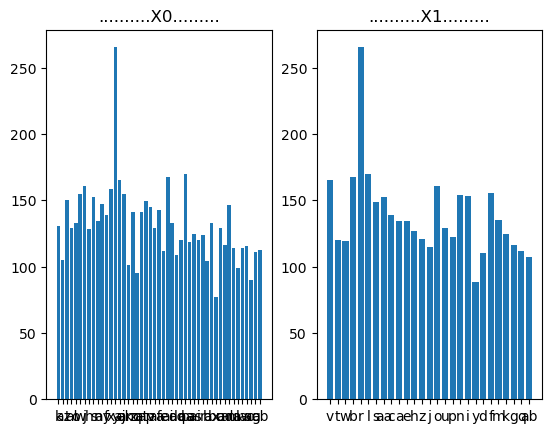

In [9]:
plt.subplot(1, 2, 1)
plt.bar(x0,Y)
plt.title("..........X0.........")

plt.subplot(1, 2, 2)
plt.bar(x1,Y)
plt.title("..........X1.........")

Text(0.5, 1.0, '..........X3.........')

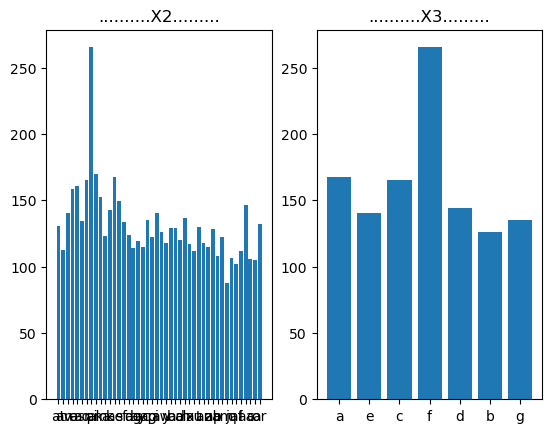

In [10]:
plt.subplot(1, 2, 1)
plt.bar(x2,Y)
plt.title("..........X2.........")

plt.subplot(1, 2, 2)
plt.bar(x3,Y)
plt.title("..........X3.........")

Text(0.5, 1.0, '..........X5.........')

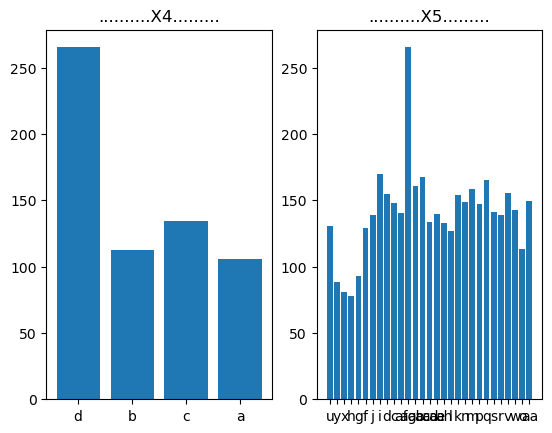

In [11]:
plt.subplot(1, 2, 1)
plt.bar(x4,Y)
plt.title("..........X4.........")

plt.subplot(1, 2, 2)
plt.bar(x5,Y)
plt.title("..........X5.........")


Text(0.5, 1.0, '..........X8.........')

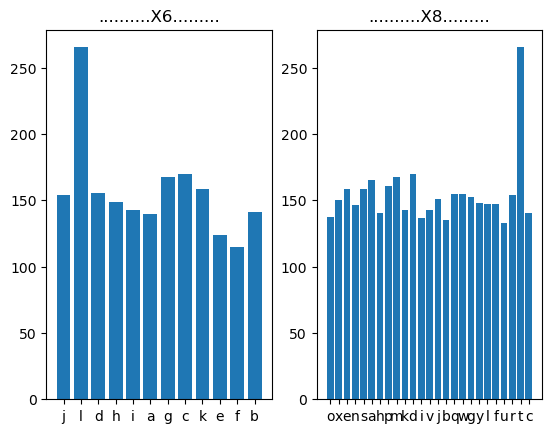

In [12]:
plt.subplot(1, 2, 1)
plt.bar(x6,Y)
plt.title("..........X6.........")

plt.subplot(1, 2, 2)
plt.bar(x8,Y)
plt.title("..........X8.........")

Lets find the variance for all the columns, we need to drop the colulmns which has variance as 0 by using var() method in pandas
And display the variance with 3 decimal points, lets also add meaningful column names to this dataframe


In [13]:
pd.options.display.float_format = '{:,.3f}'.format
variance_col = train_data.var()
variance_col = variance_col.reset_index()
variance_col.columns = ['Id', 'variance']
variance_col

,Id,variance
0,ID,"5,941,936.118"
1,y,160.767
2,X10,0.013
3,X11,0.000
4,X12,0.069
5,X13,0.055
6,X14,0.245
7,X15,0.000
8,X16,0.003
9,X17,0.008


First note worthy observation here is - Variance is automatically calculated for numerical columns only, that is what we expected.
From Above outcome we can see that first row 'ID' has largest variance, but this is not useful for our observation We see there are several rows e.g. X11, X15 have 0 variance, so these will not be impacted at all by IDV and row "ID" is vastly impacted by IDV, so lets drop them from our analysis

In [14]:
variance_col1 = variance_col.drop(0)
variance_col1

,Id,variance
1,y,160.767
2,X10,0.013
3,X11,0.000
4,X12,0.069
5,X13,0.055
6,X14,0.245
7,X15,0.000
8,X16,0.003
9,X17,0.008
10,X18,0.008


{'whiskers': [<matplotlib.lines.Line2D at 0x1add2864e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1add25f2430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1add2864b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1add25f2a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1add25f2cd0>],
 'means': []}

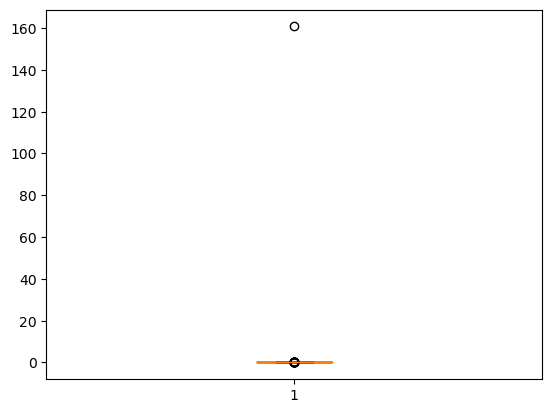

In [15]:
plt.boxplot(variance_col1['variance'])

We can see that the outlier is 160 now which is variance for y

Now lets remove the columns with variance 0 and also highest variance for ID from our main dataset

In [16]:
drop_var = variance_col.loc[variance_col['variance']==0, 'Id']
drop_var

3       X11
83      X93
97     X107
219    X233
221    X235
254    X268
275    X289
276    X290
279    X293
283    X297
315    X330
332    X347
Name: Id, dtype: object

In [17]:
train_data_updated = train_data.drop(drop_var, axis=1)
#train_data_updated.drop("ID", axis = 1, inplace=True)
train_data_updated.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.810,k,v,at,a,d,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.530,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.260,az,w,n,c,d,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.620,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In above output we noticed that X11, X93, X107 .... are all columns with variance zero, after dropping those in dataset "train_data_updated" we can see that those clumns are removed. That accomplishes our first goal.

Our next goal is to "Check for null and unique values for test and train sets."
Lets start finding all the null values now

In [18]:
train_data_updated.isnull().any(axis=1)


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

From the output we can say that - there are no null values in our train data and test data both

In [19]:
unique_train = train_data_updated['ID'].unique() #create another variable with unique values of column ID in train data
unique_train

array([   0,    6,    7, ..., 8412, 8415, 8417], dtype=int64)

In [20]:
unique_train.shape

(4209,)

In [21]:
train_data_updated['ID'].shape

(4209,)

In [22]:
test_data = pd.read_csv('dataset_files/benz_test.csv') #create dataset from test data csv
test_data.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

Based on the shape of ID column in training data unique elements in training data as per column "ID" we can say there are no Duplicates 

In [23]:
unique_test = test_data['ID'].unique()
unique_test.shape

(4209,)

In [24]:
test_data['ID'].shape

(4209,)

Based on the shape of ID column in test data unique elements in test data as per column "ID" we can say there are no Duplicate
Let also confirm the same using "duplicated" method for test and train data

In [25]:
 test_data['ID'].duplicated().sum()

0

In [26]:
train_data_updated['ID'].duplicated().sum()

0

Lets check the time taken for testing for each test case(ID)

In [27]:
plot_df = train_data_updated[['ID' , 'y']].copy()
print(plot_df)

        ID       y
0        0 130.810
1        6  88.530
2        7  76.260
3        9  80.620
4       13  78.020
5       18  92.930
6       24 128.760
7       25  91.910
8       27 108.670
9       30 126.990
10      31 102.090
11      32  98.120
12      34  82.620
13      36  94.120
14      37  99.150
15      38  93.640
16      39 106.100
17      40 114.130
18      44  89.810
19      47  90.810
20      48  90.560
21      49  94.570
22      50 108.140
23      52 120.770
24      54  84.840
25      60  93.590
26      61 104.070
27      62  89.370
28      66  90.080
29      67 128.190
30      68  76.010
31      70 107.860
32      74 106.870
33      75 104.850
34      79 114.780
35      80  91.560
36      81  98.160
37      86 117.310
38      90  79.000
39      92 110.760
40     100 101.440
41     102  91.980
42     106  98.080
43     107 139.200
44     108  85.440
45     109 110.520
46     112  91.440
47     116  91.520
48     118  91.590
49     119 108.000
50     124 116.590
51     125  

# next Step we want to apply label encoder  

In [28]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder from sklear preprocessing
category_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
le = LabelEncoder() #let us use le instead of LabelEncoder for ease of writting code
for col in category_cols:
    le.fit(train_data[col].unique().tolist() + test_data[col].unique().tolist())
    train_data[col] = le.transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [29]:
print("Categorical variables array: ", category_cols)

Categorical variables array:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [30]:
print("Label encoded Train Data:\n", train_data.head())

Label encoded Train Data:
    ID       y  X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  X12  X13  X14  X15  \
0   0 130.810  37  23  20   0   3  27   9  14    0    0    0    1    0    0   
1   6  88.530  37  21  22   4   3  31  11  14    0    0    0    0    0    0   
2   7  76.260  24  24  38   2   3  30   9  23    0    0    0    0    0    0   
3   9  80.620  24  21  38   5   3  30  11   4    0    0    0    0    0    0   
4  13  78.020  24  23  38   5   3  14   3  13    0    0    0    0    0    0   

   X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  \
0    0    0    1    0    0    1    0    0    0    0    0    0    0    0    1   
1    0    0    1    0    0    0    0    0    0    0    1    0    0    0    1   
2    0    1    0    0    0    0    0    0    0    0    1    1    1    0    1   
3    0    0    0    0    0    0    0    0    0    0    1    1    1    0    1   
4    0    0    0    0    0    0    0    0    0    0    1    1    1    0    1   

   X32  X33  X34 

###let us apply Principal component analysis on our dataset to perform dimensionality reduction

In [31]:
from sklearn.decomposition import PCA  #import PCA from sklearn
pca = PCA(n_components=10)


Let us apply fit and transform on training data , and understand its explained variance ratio

In [32]:
pca.fit(train_data.drop('y', axis=1))
train_data_pca = pd.DataFrame(pca.transform(train_data.drop('y', axis=1)))
train_data_pca['y'] = train_data['y']
print("PCA variance ratios: ", pca.explained_variance_ratio_)


PCA variance ratios:  [9.99904441e-01 4.13130289e-05 2.19765863e-05 1.10193653e-05
 8.26702521e-06 7.62663194e-06 1.42480683e-06 6.67174103e-07
 3.88754081e-07 2.62818901e-07]


In [33]:
print("Training data after principal component analysis :\n", train_data_pca.head())

Training data after principal component analysis :
            0      1      2      3       4       5      6      7     8      9  \
0 -4,205.918  0.004 -0.040 13.237  -4.335 -21.255 -2.752  4.106 1.643 -0.499   
1 -4,199.910 -0.053  1.780 11.423  -5.088 -25.188 -4.507 -0.477 0.931 -0.627   
2 -4,198.912 16.474 13.806 11.679 -15.074 -23.057 -2.233  1.172 1.701 -0.437   
3 -4,196.913 16.430 14.794  7.389   3.470 -25.485 -4.362 -1.888 2.219  0.212   
4 -4,192.949 16.845 14.089 10.237  -3.085  -8.548  3.717 -1.742 2.175  1.282   

        y  
0 130.810  
1  88.530  
2  76.260  
3  80.620  
4  78.020  


In [34]:
test_data_pca = pd.DataFrame(pca.transform(test_data))
print("Training data after principal component analysis :\n", test_data_pca.head())

Training data after principal component analysis :
            0       1      2      3       4       5      6      7      8      9
0 -4,204.921  16.408 13.628 10.991 -13.496 -19.326  6.719 -1.625  2.410  1.398
1 -4,203.965 -15.476 -9.296 -3.283 -12.162  -1.901  0.913  4.026  1.997 -0.421
2 -4,202.980  12.747 -4.126 10.583   3.734   4.662 -2.592 -0.995  0.483  0.386
3 -4,201.911  14.439 14.341  0.311  -6.198 -26.215 -3.991 -2.535  2.167 -0.022
4 -4,200.910 -12.152  1.710 12.954  -2.548 -25.366 -1.504  1.224 -2.954 -1.280


#Lets Plot the correlation matrix after PCA

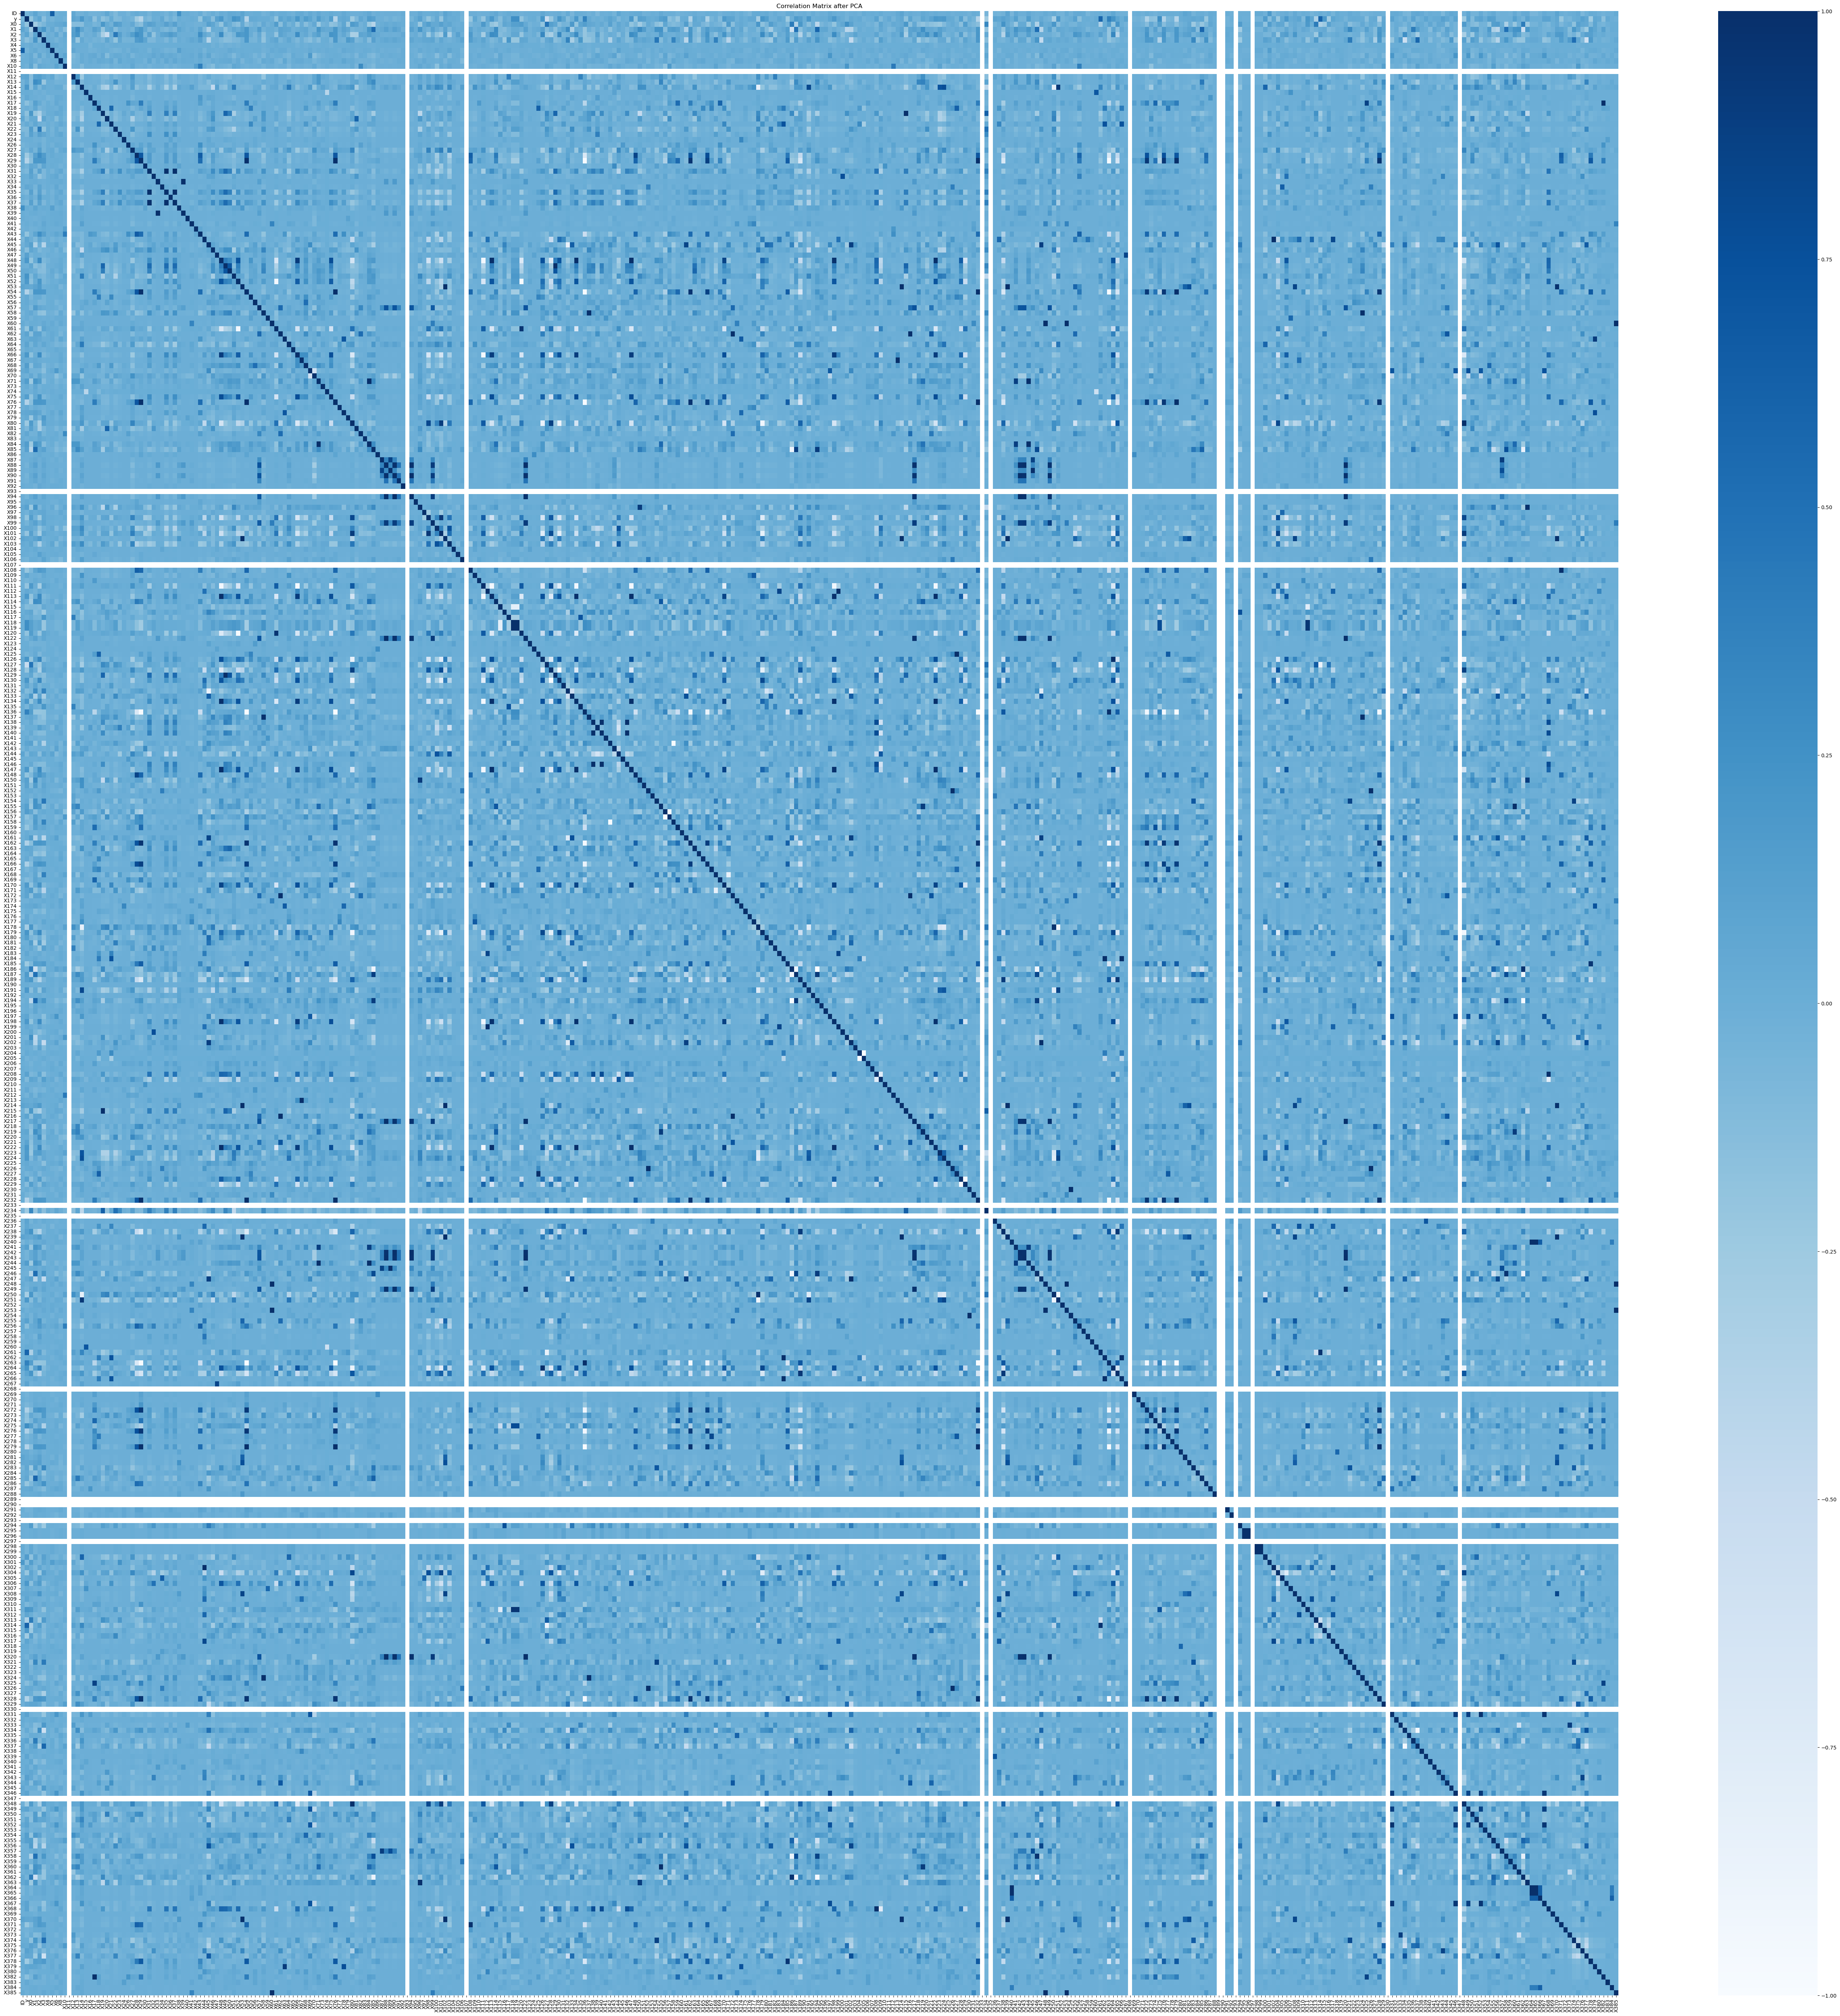

In [90]:
import seaborn as sns
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(70,70)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,  cmap='Blues')
plt.title('Correlation Matrix after PCA')
plt.show()

#Let's segregate and split our data

In [36]:
X = train_data.drop("y",axis=1)
y = train_data.loc[:,"y"]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3, random_state = 123)

# Let us apply xgboots Algorithm now and conclude our predictions

In [37]:
# Train an XGBoost model and make predictions
from xgboost import XGBRegressor
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}
xgb = XGBRegressor(n_estimators=1000, objective='reg:squarederror', seed = 123)
xgb.fit(train_X, train_y)

prediction_y = xgb.predict(test_X)
print("Predictions:\n", prediction_y)

Predictions:
 [110.59595   91.98747   98.93885  ...  96.68242  109.02192  106.353455]


In [38]:
d = pd.DataFrame()
d["test_y"] = test_y
d["prediction_y"] = prediction_y


In [39]:
#lets calculate MAPE by using formula ((test-prediction)/test)*100)
d["mp"] = abs((d["test_y"]- d["prediction_y"])/d["test_y"])
(d.mp.mean())*100

6.123251411538857

We are getting a mean absolute percentage error of 6.123251411538857% which is a good prediction. So our model is acceptable


In [70]:
from sklearn.metrics import r2_score
# Evaluating the model on the validation set
r2 = r2_score(test_y, prediction_y)
print("R^2 score:", r2)

R^2 score: 0.4697389770989081
